## Focus on exploring the data to find interesting trends, with an overarching goal of answering the following question: “Are soccer referees more likely to give red cards to dark skin toned players than light skin toned players?” Data and a description of the columns are attached.

## 2012-13 European football (soccer) professional leagues

- ## Intuitively anticipate cards behaving like a poisson distribution
    - ### Card events will be somewhat rare in general
    - ### Most players will not flagrantly foul constantly
    - ### Carding behavior for any given player will only rarely be observed and penalized
    - ### Time between carding events might be independent of time since last event.
    - ### number of games played corresponds roughly to fixed time intervals

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import scipy as sp
import statsmodels as sm
from dateutil.relativedelta import relativedelta

In [20]:
midpoint_end_of_year = pd.to_datetime('2012-12-31')
df = pd.DataFrame.from_csv('redcard.csv')
print(df.shape)
print(df.columns)

(146028, 27)
Index(['player', 'club', 'leagueCountry', 'birthday', 'height', 'weight',
       'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')


In [21]:
def calc_age(date2):
    return relativedelta(midpoint_end_of_year, date2).years
df['birthday'] = pd.to_datetime(df.birthday)
df['Age'] = df.birthday.apply(calc_age)

In [48]:
df['winRate'] = df.victories/df.games
df['tieRate'] = df.ties/df.games
df['lossRate'] = df.defeats/df.games
df['goalRate'] = df.goals/df.games
df['meanRating'] = (df.rater1 + df.rater2)/2


df['totalReds'] = df.redCards + df.yellowReds
df['totalCards'] = df.redCards + df.yellowCards
df['totalCardsRed2'] = (df.redCards * 2) + df.yellowCards

df['redCardRate'] = df.redCards / df.games
df['yellowCardRate'] = df.yellowCards / df.games
df['totalRedCardRate'] = df.totalReds / df.games
df['totalCardRate'] = df.totalCards / df.games
df['totalCardRateRed2'] = df.totalCardsRed2 / df.games

df['wasYellowCarded'] = df.yellowCards > 0
df['wasRedCarded'] = df.redCards > 0
df['wasYellowRedCarded'] = df.yellowReds > 0
df['wasAnyRedCarded'] = df.wasRedCarded | df.wasYellowRedCarded

In [49]:
df.sort_values(by=['games', 'totalCardRateRed2'], ascending=False)[['games', 'redCards','yellowCards','yellowReds', 'totalCardRateRed2', 'totalCardRate','redCardRate', 'yellowCardRate', 'totalRedCardRate', 'meanRating']][0:5]

,games,redCards,yellowCards,yellowReds,totalCardRateRed2,totalCardRate,redCardRate,yellowCardRate,totalRedCardRate,meanRating
playerShort,,,,,,,,,,
philipp-lahm,47,0,3,0,0.063830,0.063830,0.0,0.063830,0.0,0.250
bastian-schweinsteiger,46,0,7,0,0.152174,0.152174,0.0,0.152174,0.0,0.250
paul-scholes,44,0,8,0,0.181818,0.181818,0.0,0.181818,0.0,0.000
frank-lampard,44,0,4,0,0.090909,0.090909,0.0,0.090909,0.0,0.125
michael-carrick,42,0,6,0,0.142857,0.142857,0.0,0.142857,0.0,0.000


In [56]:
df.sort_values(by=['totalReds', 'redCards'], ascending=False)[['games', 'meanRating', 'redCards','yellowCards','yellowReds', 'totalReds', 'wasYellowCarded', 'wasRedCarded', 'wasYellowRedCarded', 'wasAnyRedCarded']][0:5]

,games,meanRating,redCards,yellowCards,yellowReds,totalReds,wasYellowCarded,wasRedCarded,wasYellowRedCarded,wasAnyRedCarded
playerShort,,,,,,,,,,
sergio-ramos,18,0.00,2,6,1,3,True,True,True,True
emmanuel-adebayor,23,1.00,2,4,1,3,True,True,True,True
sergio-ramos,32,0.00,1,14,2,3,True,True,True,True
ricardo-costa,6,0.25,0,2,3,3,True,False,True,True
pallardo,3,0.25,0,0,3,3,False,False,True,True


In [15]:
# print(df.position.unique())
# print(df.Alpha_3.unique())
# print(df.birthday.dt.year)

In [27]:
sn.lmplot(x='rater1', y='rater2', data=df)
plt.show()

In [37]:
sn.distplot(a=df.meanRating.dropna())
plt.show()

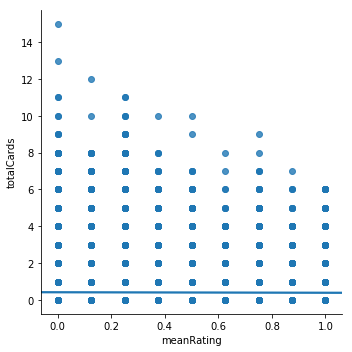

In [46]:
sn.lmplot(x='meanRating',y='totalCards', data=df)
plt.show()

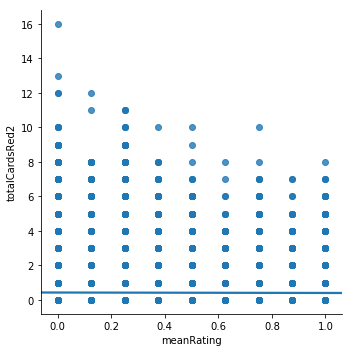

In [45]:
sn.lmplot(x='meanRating',y='totalCardsRed2', data=df)
plt.show()

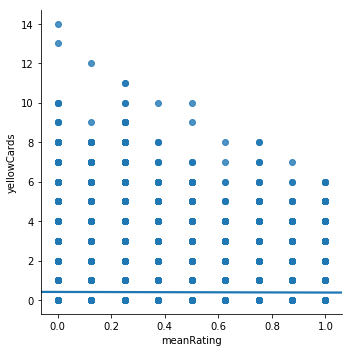

In [42]:
sn.lmplot(x='meanRating',y='yellowCards', data=df)
plt.show()

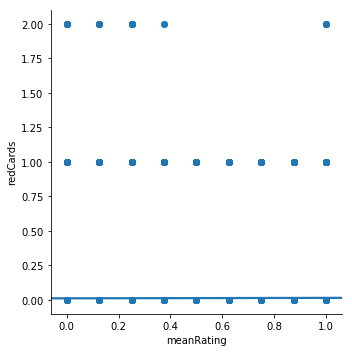

In [43]:
sn.lmplot(x='meanRating',y='redCards', data=df)
plt.show()

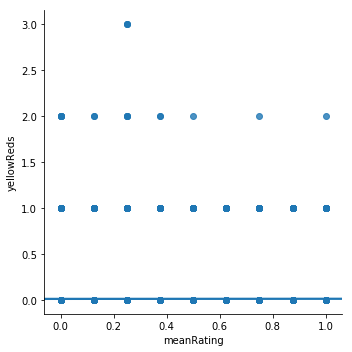

In [44]:
sn.lmplot(x='meanRating',y='yellowReds', data=df)
plt.show()